In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kununurra
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | kalmunai
Processing Record 5 of Set 1 | umm lajj
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | warqla
City not found. Skipping...
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Proc

Processing Record 34 of Set 4 | mogadishu
Processing Record 35 of Set 4 | lodja
Processing Record 36 of Set 4 | vila
Processing Record 37 of Set 4 | santo antonio do amparo
Processing Record 38 of Set 4 | bandarbeyla
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | port pirie
Processing Record 41 of Set 4 | isabela
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | phalodi
Processing Record 44 of Set 4 | nelson bay
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | kousseri
Processing Record 48 of Set 4 | mocuba
Processing Record 49 of Set 4 | namibe
Processing Record 50 of Set 4 | singapore
Processing Record 1 of Set 5 | hit
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | zhigansk
Processing Record 7 of Set 5 | suntar
Processin

City not found. Skipping...
Processing Record 24 of Set 8 | arbagar
Processing Record 25 of Set 8 | pio xii
Processing Record 26 of Set 8 | kulhudhuffushi
Processing Record 27 of Set 8 | dzilam gonzalez
Processing Record 28 of Set 8 | nuevo casas grandes
Processing Record 29 of Set 8 | mareeba
Processing Record 30 of Set 8 | sarangani
Processing Record 31 of Set 8 | pishin
Processing Record 32 of Set 8 | karaul
City not found. Skipping...
Processing Record 33 of Set 8 | mercedes
Processing Record 34 of Set 8 | haines junction
Processing Record 35 of Set 8 | mokobeng
Processing Record 36 of Set 8 | araouane
Processing Record 37 of Set 8 | matara
Processing Record 38 of Set 8 | nanortalik
Processing Record 39 of Set 8 | kodiak
Processing Record 40 of Set 8 | egvekinot
Processing Record 41 of Set 8 | olafsvik
Processing Record 42 of Set 8 | presidencia roque saenz pena
Processing Record 43 of Set 8 | gazanjyk
Processing Record 44 of Set 8 | marica
Processing Record 45 of Set 8 | ardabil
P

Processing Record 12 of Set 12 | olinda
Processing Record 13 of Set 12 | kaitangata
Processing Record 14 of Set 12 | kunming
Processing Record 15 of Set 12 | antropovo
Processing Record 16 of Set 12 | nenjiang
Processing Record 17 of Set 12 | dinguiraye
Processing Record 18 of Set 12 | abaete
Processing Record 19 of Set 12 | glyadyanskoye
Processing Record 20 of Set 12 | cabedelo
Processing Record 21 of Set 12 | dwarka
Processing Record 22 of Set 12 | umba
Processing Record 23 of Set 12 | piacabucu
Processing Record 24 of Set 12 | palanga
Processing Record 25 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 26 of Set 12 | kahta
Processing Record 27 of Set 12 | quzhou
Processing Record 28 of Set 12 | antofagasta
Processing Record 29 of Set 12 | arona
Processing Record 30 of Set 12 | constantine
Processing Record 31 of Set 12 | prosotsani
Processing Record 32 of Set 12 | camacha
Processing Record 33 of Set 12 | buala
Processing Record 34 of Set 12 | mirnyy
Processing Rec

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kununurra,-15.7667,128.7333,87.78,70,40,5.75,AU,2022-02-20 11:04:07
1,Airai,-8.9266,125.4092,62.13,94,87,1.50,TL,2022-02-20 11:04:08
2,Kalmunai,7.4167,81.8167,81.70,77,68,12.95,LK,2022-02-20 11:04:08
3,Umm Lajj,25.0213,37.2685,66.43,50,25,13.27,SA,2022-02-20 11:04:09
4,Coquimbo,-29.9533,-71.3436,58.73,82,20,0.00,CL,2022-02-20 11:04:09
5,Qaanaaq,77.4840,-69.3632,-2.45,47,88,9.10,GL,2022-02-20 11:04:09
6,San Patricio,28.0170,-97.5169,57.06,79,78,4.76,US,2022-02-20 11:04:10
7,Yellowknife,62.4560,-114.3525,-40.45,100,37,4.34,CA,2022-02-20 11:01:10
8,Busselton,-33.6500,115.3333,80.10,51,100,13.29,AU,2022-02-20 11:04:10
9,Fortuna,40.5982,-124.1573,46.33,94,100,4.61,US,2022-02-20 11:04:11


In [10]:
print (city_data_df)

           City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0     Kununurra -15.7667  128.7333     87.78        70          40   
1         Airai  -8.9266  125.4092     62.13        94          87   
2      Kalmunai   7.4167   81.8167     81.70        77          68   
3      Umm Lajj  25.0213   37.2685     66.43        50          25   
4      Coquimbo -29.9533  -71.3436     58.73        82          20   
..          ...      ...       ...       ...       ...         ...   
581    Chumikan  54.7183  135.3150     -6.88        92          89   
582  Wilmington  34.2257  -77.9447     35.89        63           0   
583     Ha Tinh  18.3333  105.9000     50.76        91         100   
584       Tahta  26.7693   31.5021     65.70        31           0   
585         Eyl   7.9803   49.8164     82.27        51          80   

     Wind Speed Country                 Date  
0          5.75      AU  2022-02-20 11:04:07  
1          1.50      TL  2022-02-20 11:04:08  
2         12.95   

In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kununurra,AU,2022-02-20 11:04:07,-15.7667,128.7333,87.78,70,40,5.75
1,Airai,TL,2022-02-20 11:04:08,-8.9266,125.4092,62.13,94,87,1.50
2,Kalmunai,LK,2022-02-20 11:04:08,7.4167,81.8167,81.70,77,68,12.95
3,Umm Lajj,SA,2022-02-20 11:04:09,25.0213,37.2685,66.43,50,25,13.27
4,Coquimbo,CL,2022-02-20 11:04:09,-29.9533,-71.3436,58.73,82,20,0.00
5,Qaanaaq,GL,2022-02-20 11:04:09,77.4840,-69.3632,-2.45,47,88,9.10
6,San Patricio,US,2022-02-20 11:04:10,28.0170,-97.5169,57.06,79,78,4.76
7,Yellowknife,CA,2022-02-20 11:01:10,62.4560,-114.3525,-40.45,100,37,4.34
8,Busselton,AU,2022-02-20 11:04:10,-33.6500,115.3333,80.10,51,100,13.29
9,Fortuna,US,2022-02-20 11:04:11,40.5982,-124.1573,46.33,94,100,4.61


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

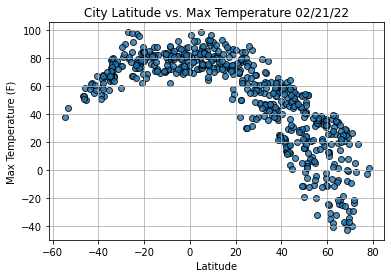

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

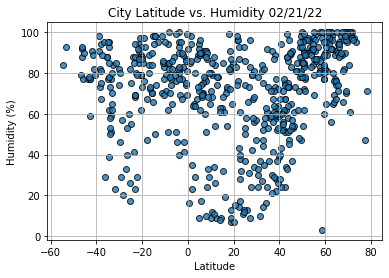

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

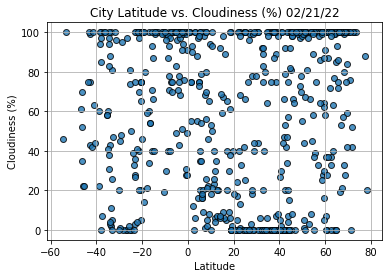

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

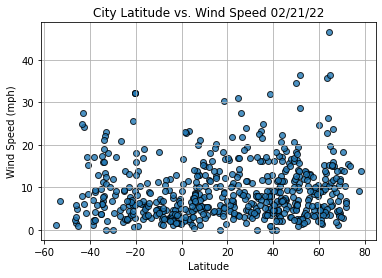

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kalmunai,LK,2022-02-20 11:04:08,7.4167,81.8167,81.70,77,68,12.95
3,Umm Lajj,SA,2022-02-20 11:04:09,25.0213,37.2685,66.43,50,25,13.27
5,Qaanaaq,GL,2022-02-20 11:04:09,77.4840,-69.3632,-2.45,47,88,9.10
6,San Patricio,US,2022-02-20 11:04:10,28.0170,-97.5169,57.06,79,78,4.76
7,Yellowknife,CA,2022-02-20 11:01:10,62.4560,-114.3525,-40.45,100,37,4.34


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

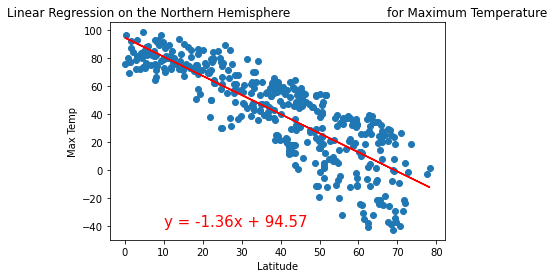

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

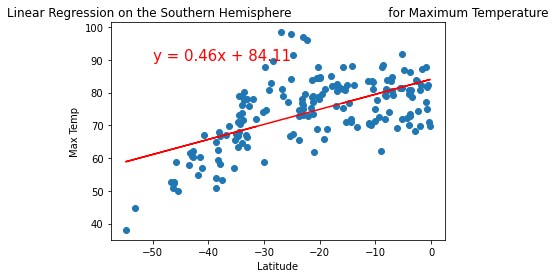

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

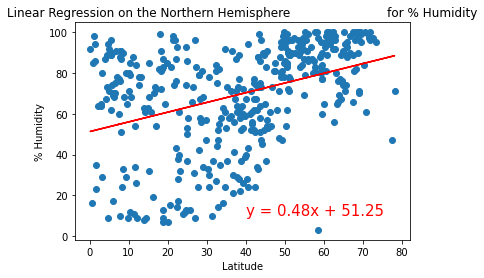

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

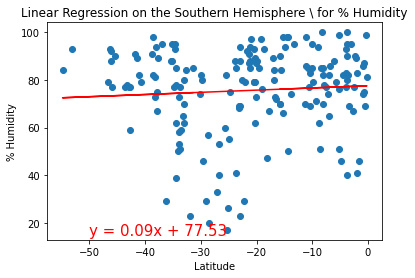

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

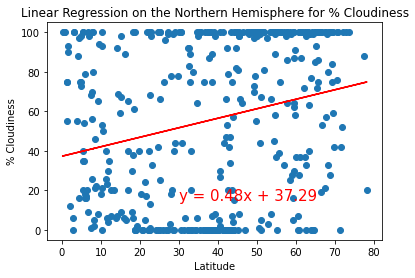

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(30,15))

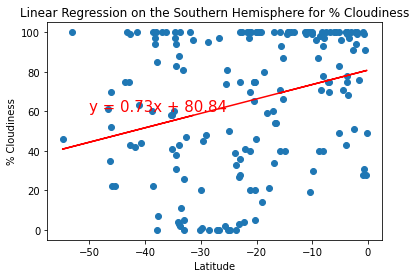

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

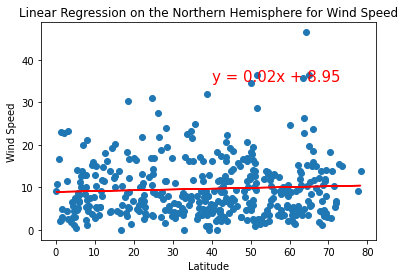

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

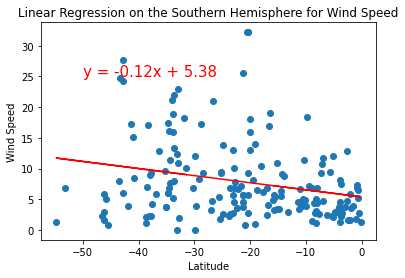

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))